<img src="img/ej5.png">

Para satisfacer esta plantilla debemos realizar un filtro pasa-altos. Para que tenga el menor orden posible debe ser de tipo Chebyshev.
Noramlizamos en frecuencia:

In [61]:
from sympy import  *
import numpy as np
from sympy.abc import s
from IPython.display import display, Math
from splane import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import math as m

w_p = 9600*2*pi
w_s = 3200*2*pi

w_p_n = w_p / w_p
w_s_n = w_s / w_p

print("wpn = ", w_p_n)
print("wsn = ", w_s_n)

wpn =  1
wsn =  1/3


Y ahora realizamos la transformacion de pasa-altos a pasabajos:

In [81]:
Omega_p = 1 / w_p_n
Omega_s = 1 / w_s_n

print("Omega_p = ", Omega_p)
print("Omega_s = ", Omega_s)

w_s_lp = abs(Omega_s)

alpha_max = 0.4    # dB
alpha_min = 48   # dB

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh(sqrt(m.pow(10, alpha_min * 0.1) - 1) / epsilon) / (m.acosh(w_s_lp))
N = m.ceil(N)

print(f'epsilon: {epsilon}, N: {N}')

Omega_p =  1
Omega_s =  3
epsilon: 0.3106093948083108, N: 5


In [82]:
w,T=symbols("w,T")
T = 1/(1+(epsilon**2)*(16*w**5 - 20*w**3 +5*w)**2)


num, den = fraction(simplify(expand(T)))  #simplificamos y separamos numerador y denominador

display(T)

num = Poly(num,s)
den = Poly(den,s)

T = num/den
display(T)

1/(0.0964781961431851*(16*w**5 - 20*w**3 + 5*w)**2 + 1)

1/(24.6984182126554*w**10 - 61.7460455316385*w**8 + 54.0277898401837*w**6 - 19.295639228637*w**4 + 2.41195490357963*w**2 + 1.0)

Buscamos los polos:

In [90]:
coeffs_den = [-24.6984182126554,0,-61.7460455316385,0,-54.0277898401837,0,-19.295639228637,0,-2.41195490357963,0,1]
polos = np.roots(coeffs_den)
polost = []


for polo in polos:
    if (polo.real <0):
        polost.append(polo.round(2))
        
print("polos:",polost)

polos: [(-0.12+1.02j), (-0.12-1.02j), (-0.31+0.63j), (-0.31-0.63j), (-0.39+0j)]


In [91]:
wo_1 = abs(polost[0])
print("wo1 =",wo_1)

wo_2 = abs(polost[2])
print("wo2 =",wo_2)

wo_3 = abs(polost[4])
print("wo3 =",wo_3)

q1 = 1/(2*cos(atan(polost[0].imag/polost[0].real)))
print("Q1 =",q1)
q2 = 1/(2*cos(atan(polost[2].imag/polost[2].real)))
print("Q2 =",q2)
q3 = 1/(2*cos(atan(polost[4].imag/polost[4].real)))
print("Q3 =",q3)

wo1 = 1.0270345661174214
wo2 = 0.7021395872616784
wo3 = 0.39
Q1 = 4.27931069215592
Q2 = 1.13248320526077
Q3 = 1/2


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

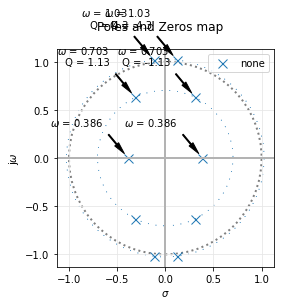

In [92]:
my_tf = TransferFunction( [1], coeffs_den )

pzmap(my_tf, 10) #S plane pole/zero plot

In [97]:
T1,T2,T3 = symbols("T1,T2,T3")

T1 = (1/abs((coeffs_den[0])))/(s + wo_3) #en el numerador debemos poner una constante que representa al coeff del s**10
display(T1)
T2 = wo_2**2/(s**2 + s*(wo_2/q2) + wo_2**2)
display(T2)
T3 = wo_1**2/(s**2 + s*(wo_1/q1) + wo_1**2)
display(T3)

0.0404884228370383/(s + 0.39)

0.493/(s**2 + 0.62*s + 0.493)

1.0548/(s**2 + 0.24*s + 1.0548)

Esto puede ser implementado con dos filtros pasa-altos de 2° orden, y unos de 1° orden.

In [98]:
T1_pa = T1.subs(s, 1/s)
T2_pa = T2.subs(s, 1/s)
T3_pa = T3.subs(s, 1/s)

T1_pa = simplify(expand(T1_pa))
T2_pa = simplify(expand(T2_pa))
T3_pa = simplify(expand(T3_pa))

display(T1_pa)
display(T2_pa)
display(T3_pa)

0.0404884228370383*s/(0.39*s + 1)

0.493*s**2/(0.493*s**2 + 0.62*s + 1)

1.0548*s**2/(1.0548*s**2 + 0.24*s + 1)

In [99]:
T1_pa = T1_pa.subs(s, s/w_p)
T2_pa = T2_pa.subs(s, s/w_p)
T3_pa = T3_pa.subs(s, s/w_p)

T1_pa = simplify(expand(T1_pa))
T2_pa = simplify(expand(T2_pa))
T3_pa = simplify(expand(T3_pa))

display(T1_pa)
display(T2_pa)
display(T3_pa)

2.10877202276241e-6*s/(2.03125e-5*s + pi)

1.33734809027778e-9*s**2/(1.33734809027778e-9*s**2 + 3.22916666666667e-5*pi*s + pi**2)

2.861328125e-9*s**2/(2.861328125e-9*s**2 + 1.25e-5*pi*s + pi**2)

In [100]:
num3, den3 = fraction(simplify(expand(T3_pa)))  #simplificamos y separamos numerador y denominador
num2, den2 = fraction(simplify(expand(T2_pa)))  #simplificamos y separamos numerador y denominador

num3 = Poly(num3,s)
den3 = Poly(den3,s)
num2 = Poly(num2,s)
den2 = Poly(den2,s)

num2 = num2.monic() #hacemos que el numerador y denominador sean monicos
den2 = den2.monic()
num3 = num3.monic() #hacemos que el numerador y denominador sean monicos
den3 = den3.monic()

T2_pa = num2/den2
T3_pa = num3/den3

display(T2_pa)
display(T3_pa)

1.0*s**2/(1.0*s**2 + 24146.0446247464*pi*s + 747748478.701825*pi**2)

1.0*s**2/(1.0*s**2 + 4368.60068259385*pi*s + 349488054.607509*pi**2)

Obtenemos los valores de los componentes y simulamos:

<img src="img/simulacion_ej5.png">

Podemos comprobar que cumplimos los requisitos del filtro

Si ahora usamos una norma de impedancia $\Omega_Z$ = 2.2K, los valores de los componentes seran:

$R_{N}=\frac{R}{\Omega_Z}, L_N = \frac{R_N.Q}{\omega_o}, C_N=\frac{1}{R_N.Q.\omega_o}$

Enonces me queda:

$R_1=4.545, L_1=60\mu H, C_1=2.26\mu F$

$R_2=4.545, L_2=331.22\mu H, C_2=0.875\mu F$}

$R_3=7.03, L_3=45.45\mu H$

<img src="img/ej5_norm.png">

Lo siguiente que haremos es activar las bobinas utilizando OTAs. El circuito sera el siguiente:

<img src="img/ej5_OTA.png">

Y su transferencia es:

<img src="img/ej5_transf_OTA.png">

Podemos ver que la transferencia es identica a la obtenida con elementos pasivos.